In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd         
   
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df= pd.read_csv('housing.csv')

rows,columns= df.shape
print("Rows:",rows)
print("Columns:",columns)
df

Rows: 20640
Columns: 10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [63]:
numeric_data = df.select_dtypes(include=[np.number])
mean = numeric_data.mean()
median = numeric_data.median()
standard_deviation = numeric_data.std()
numeric_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Figure size 1000x600 with 0 Axes>

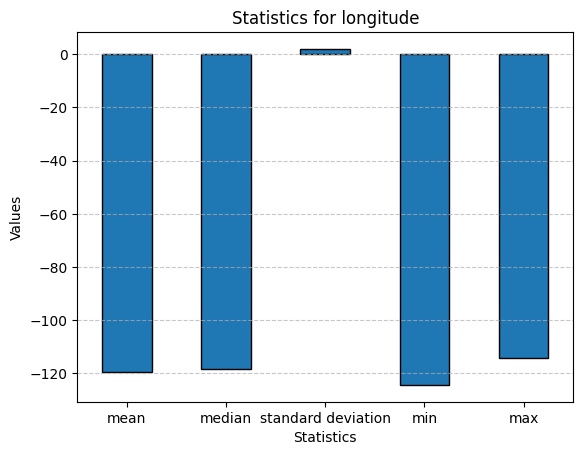

<Figure size 1000x600 with 0 Axes>

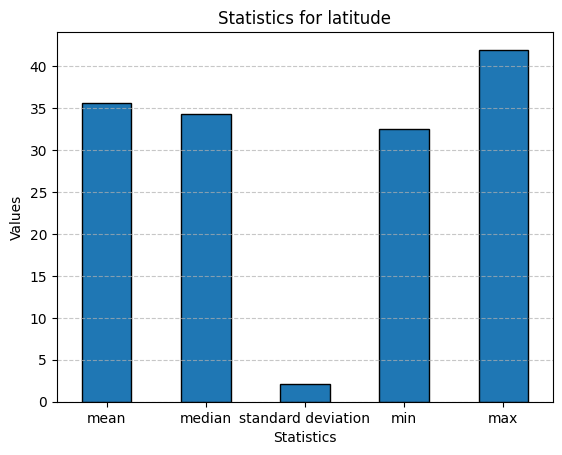

<Figure size 1000x600 with 0 Axes>

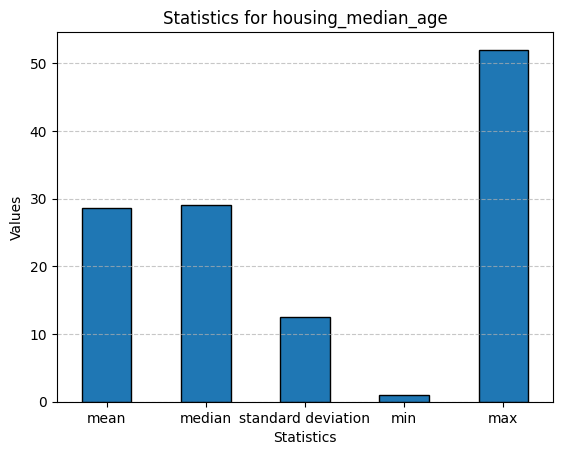

<Figure size 1000x600 with 0 Axes>

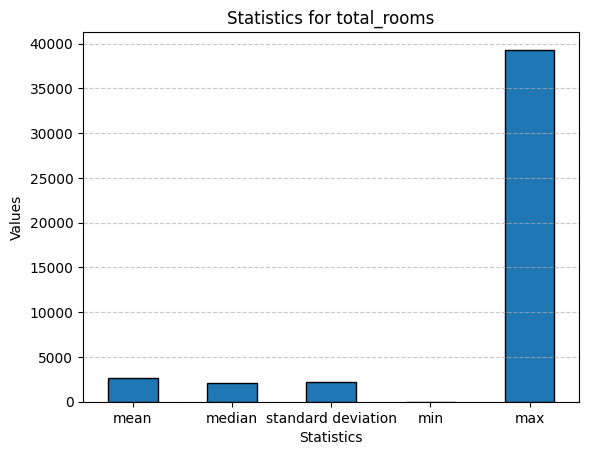

<Figure size 1000x600 with 0 Axes>

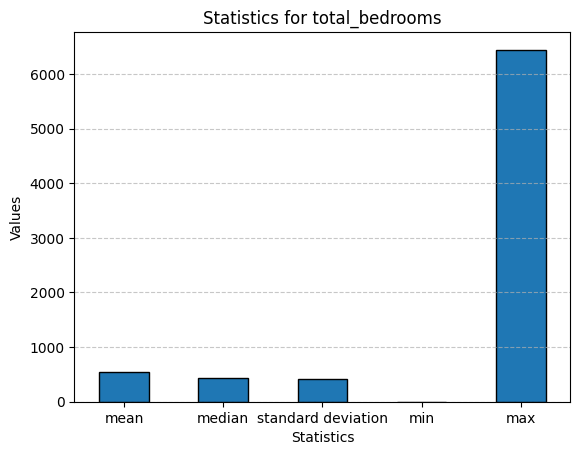

<Figure size 1000x600 with 0 Axes>

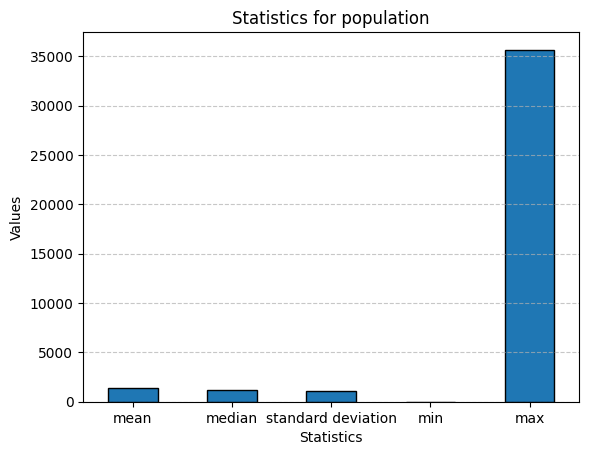

<Figure size 1000x600 with 0 Axes>

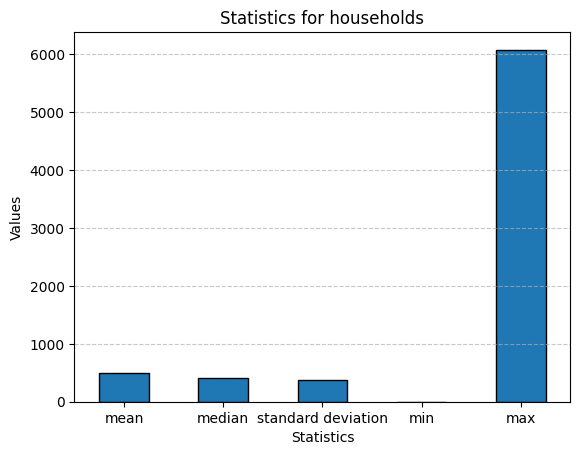

<Figure size 1000x600 with 0 Axes>

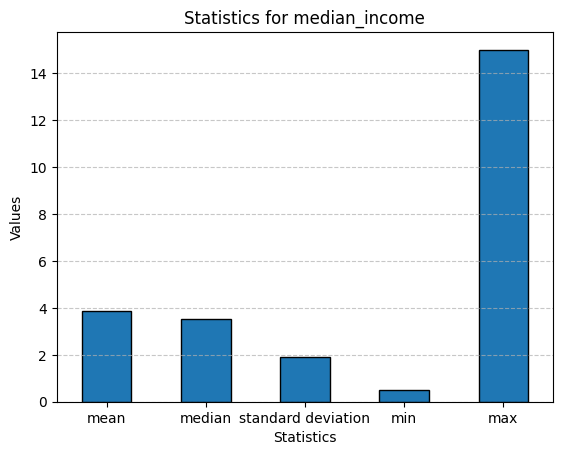

<Figure size 1000x600 with 0 Axes>

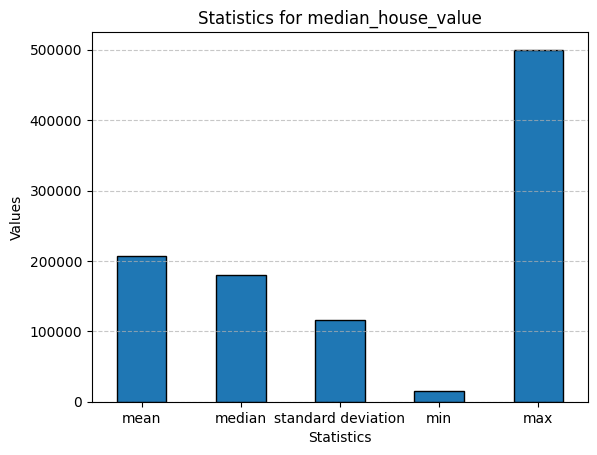

In [64]:




for column in numeric_data.columns:
    stats={
        'mean':numeric_data[column].mean(),
        'median':numeric_data[column].median(),
        'standard deviation':numeric_data[column].std(),
        'min':numeric_data[column].min(),
        'max':numeric_data[column].max()
    }
    
    stats_df = pd.DataFrame(stats, index=[0])
    stats_df = pd.DataFrame(stats, index=[0])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    stats_df.T.plot(kind='bar', legend=False, edgecolor='black')
    plt.title(f'Statistics for {column}')
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

In [65]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
columns_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:")
print(columns_with_missing)
print(missing_values)

Columns with missing values:
['total_bedrooms']
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [66]:
def plot(df):
    # Assuming columns_with_missing is a list of column names with missing values
    
    
    for column in columns_with_missing:
        df[column].plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f'{column} histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    
    


BEFORE replacing Missing Values

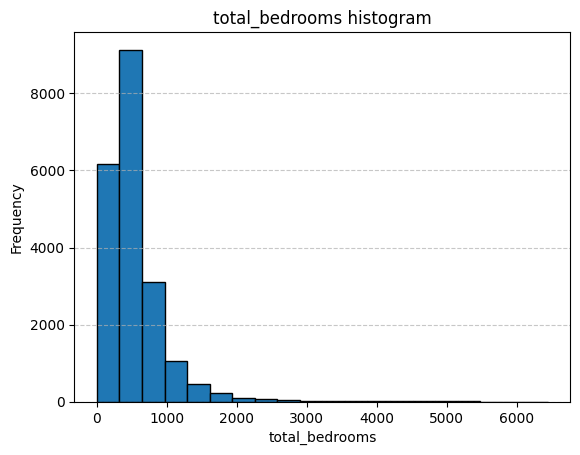

In [67]:
plot(df)

In [68]:
columns_with_missing_1 = df.columns[df.isnull().any()]

for column in columns_with_missing_1:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    


In [69]:
missing_values =df.isnull().sum()
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


After repacling missing values

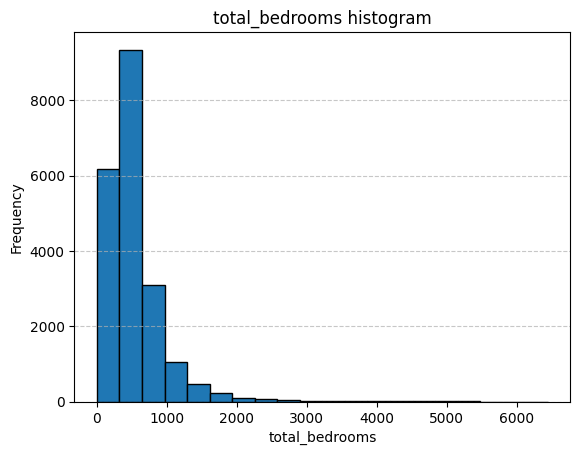

In [70]:
plot(df)

In [71]:
df = df.drop_duplicates()

In [72]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


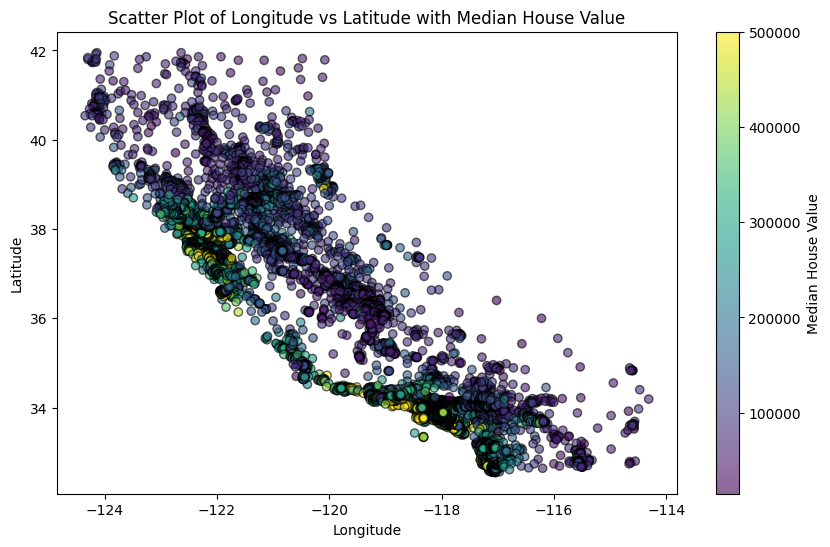

In [73]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6, edgecolor='k')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value')

# Label axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a descriptive title
plt.title('Scatter Plot of Longitude vs Latitude with Median House Value')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Relationship Between Median Income and Median House Value')

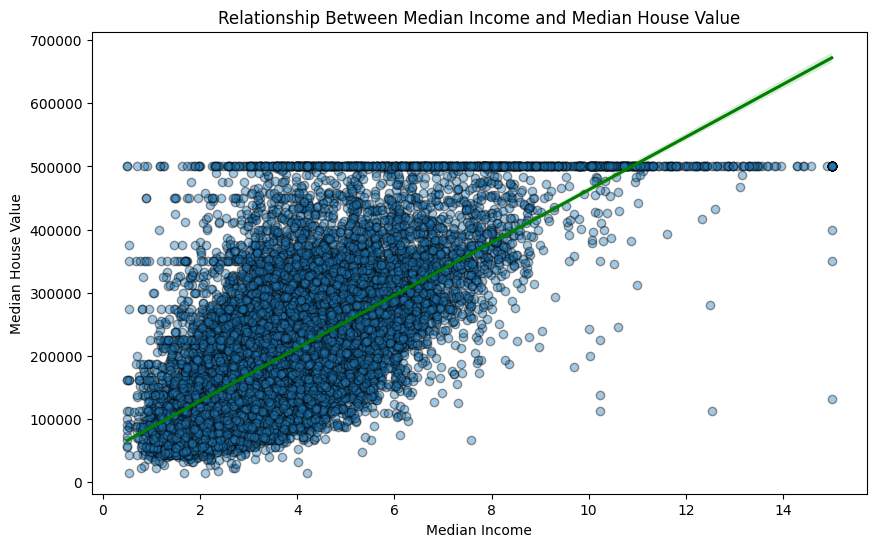

In [74]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='median_income', y='median_house_value', data=df, scatter_kws={'alpha':0.4, 'edgecolor':'k'}, line_kws={'color':'green'})

# Label axes
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Add a descriptive title
plt.title('Relationship Between Median Income and Median House Value')


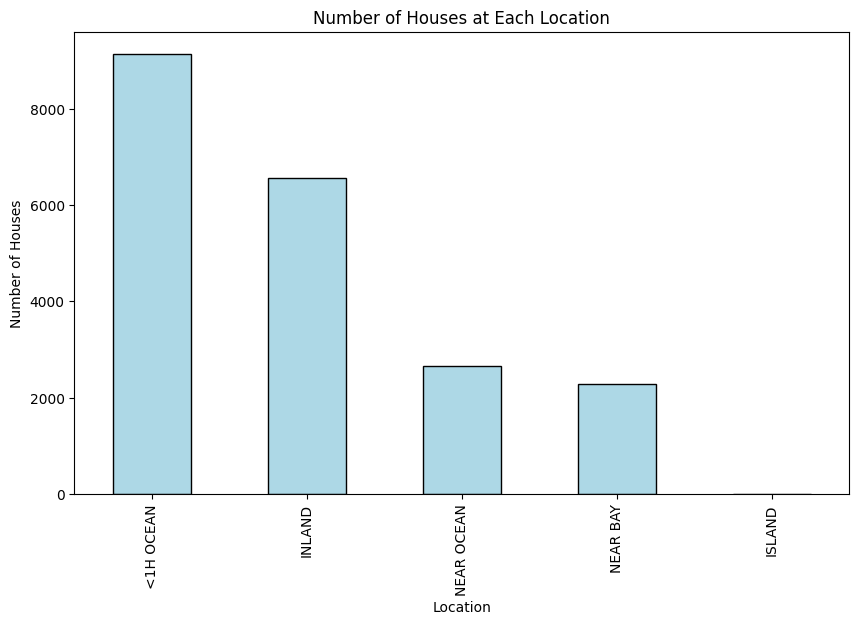

In [75]:
location_counts = df['ocean_proximity'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Label axes
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Add a descriptive title
plt.title('Number of Houses at Each Location')

# Show the plot
plt.show()



In [76]:
# 1. Grouping the data by ocean_proximity and calculating summary statistics
grouped_stats = df.groupby('ocean_proximity').describe()

# Displaying the summary statistics
grouped_stats

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND          -118.3200 -118.32      5.0  33.358000  ...      2.833300   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  ...      5.054425   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  ...      4.837400   

                         median_house_value                                \
                     max              count           mean            std   
ocean_proximity                                                             
<1H OCEAN        15.0001             9136.0  240084.285464  106124.292213   
INLAND           15.0001             6551.0  124805.392001   70007.908494   
ISLAND            3.3906                5.0  380440.000000   80559.561816   
NEAR BAY         15.0001             2290.0  259212.311790  122818.537064   
NEAR OCEAN       15.0001             2658.0  249433.977427  122477.145927   

                                                                   
                      min       25%       50%       75%       max  
ocean_proximity                                                    
<1H OCEAN         17500.0  164100.0  214850.0  289100.0  500001.0  
INLAND            14999.0   77500.0  108500.0  148950.0  500001.0  
ISLAND           287500.0  300000.0  414700.0  450000.0  450000.0  
NEAR BAY          22500.0  162500.0  233800.0  345700.0  500001.0  
NEAR OCEAN        22500.0  150000.0  229450.0  322750.0  500001.0  

[5 rows x 72 columns]

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\2612570902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')


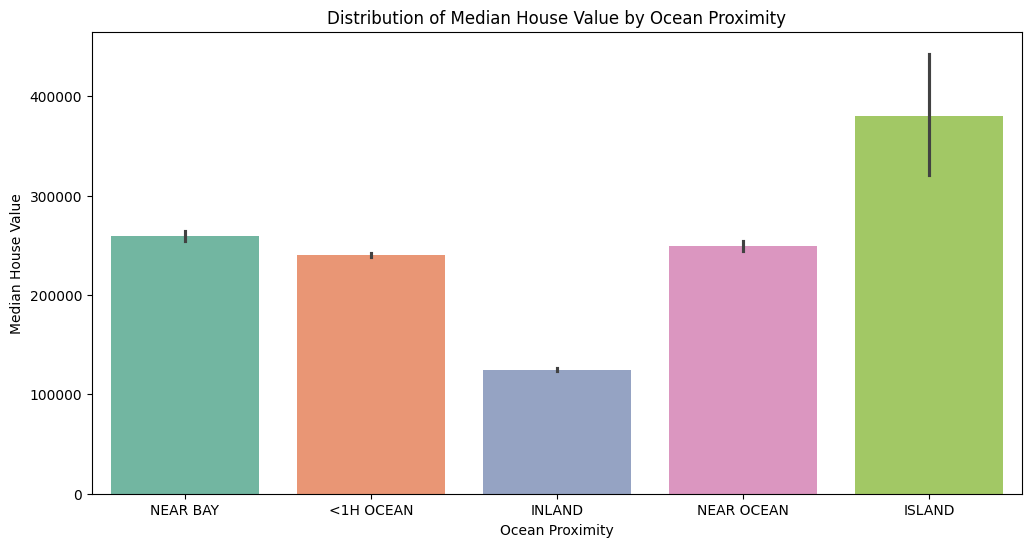

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [78]:

df_encoded = pd.get_dummies(df, columns=['ocean_proximity']).astype(int)



In [79]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0


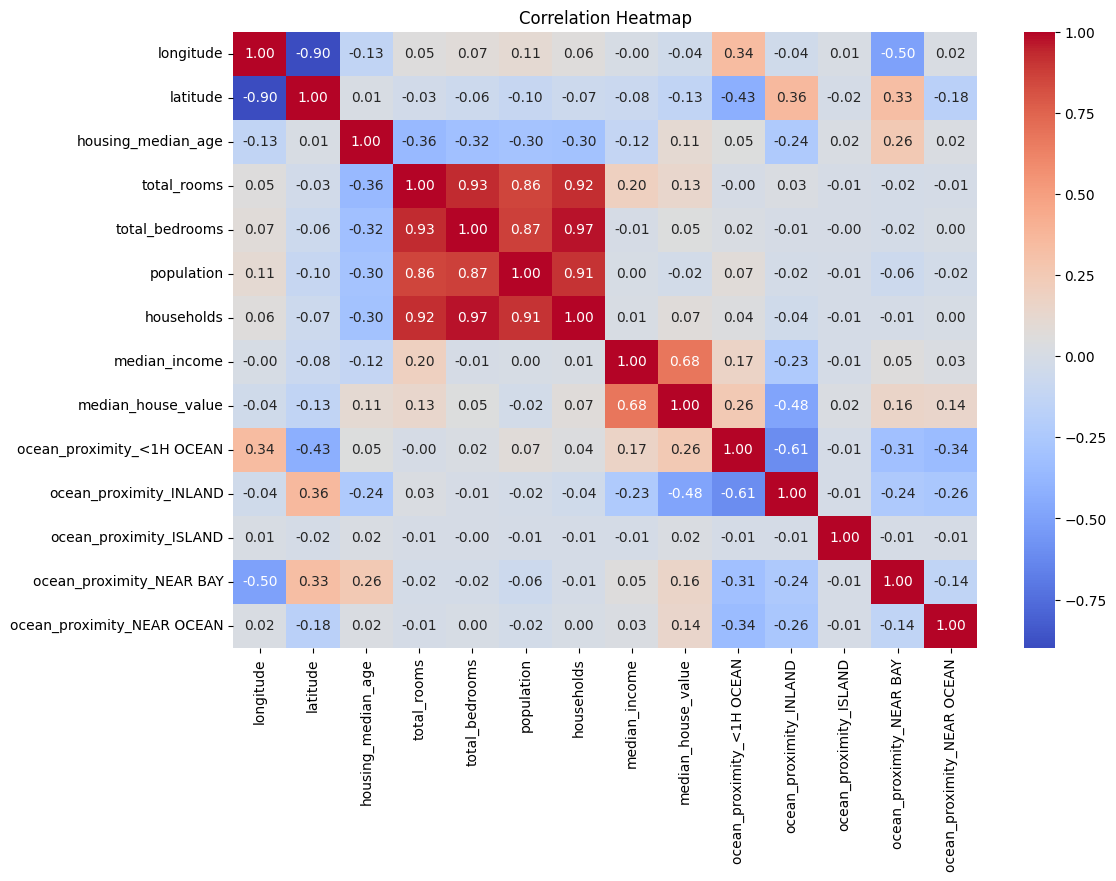

In [80]:
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


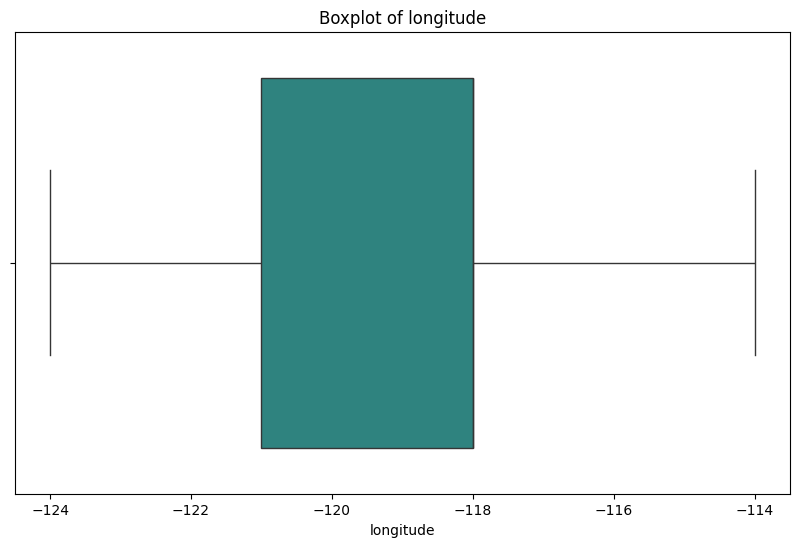

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


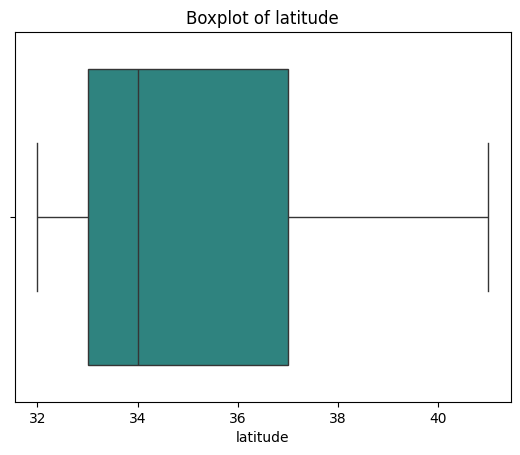

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


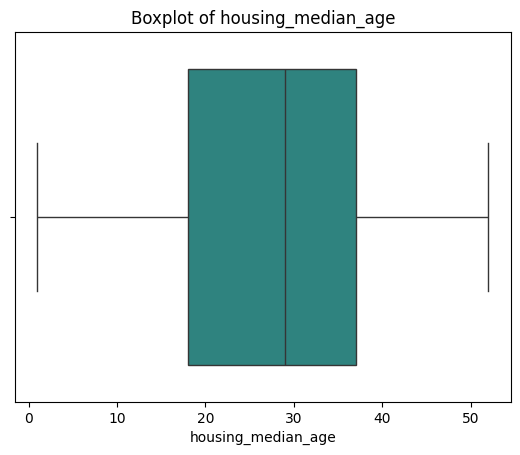

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


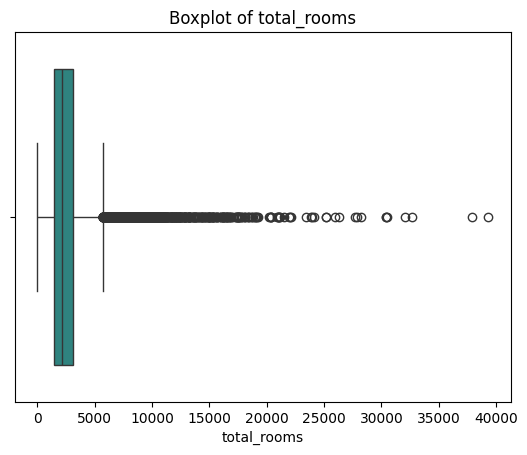

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


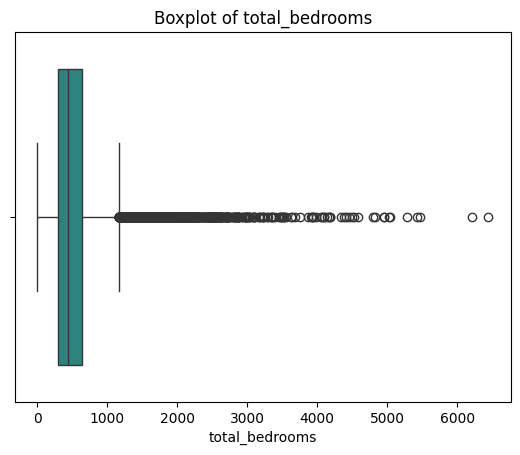

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


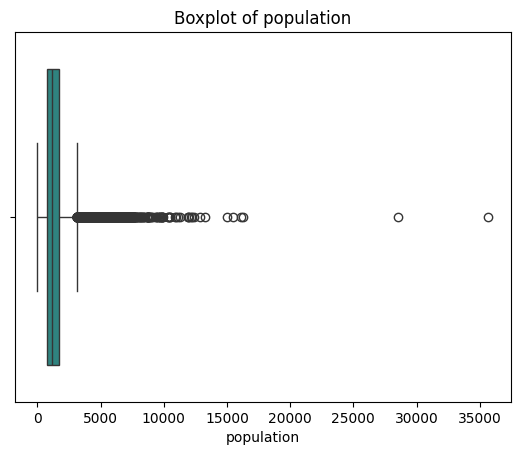

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


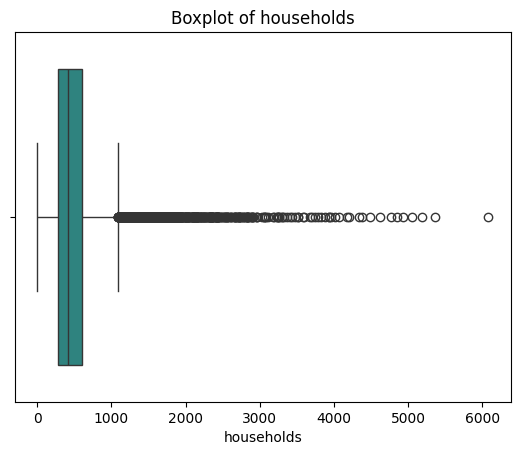

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


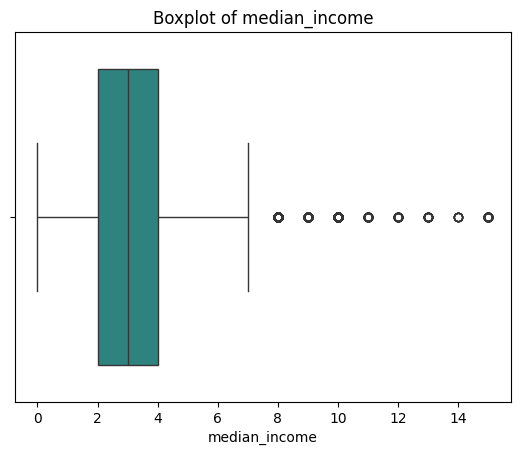

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


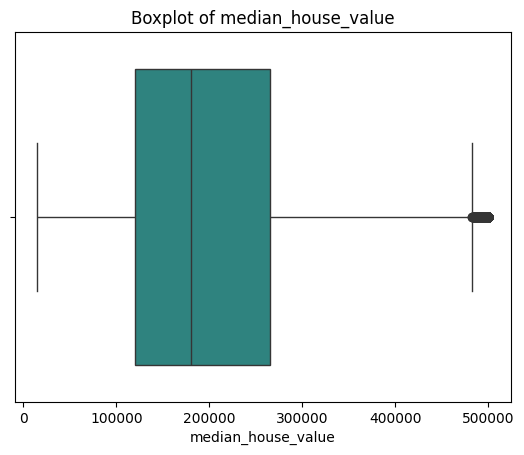

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


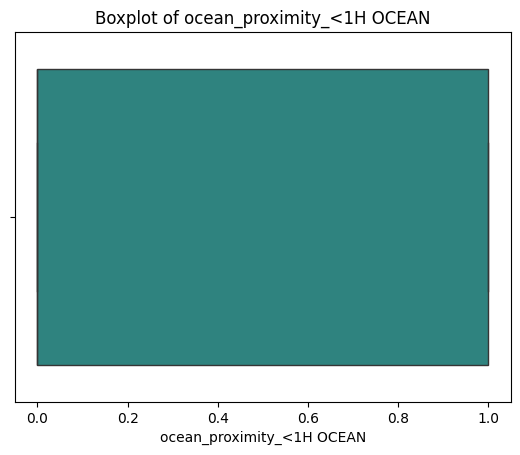

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


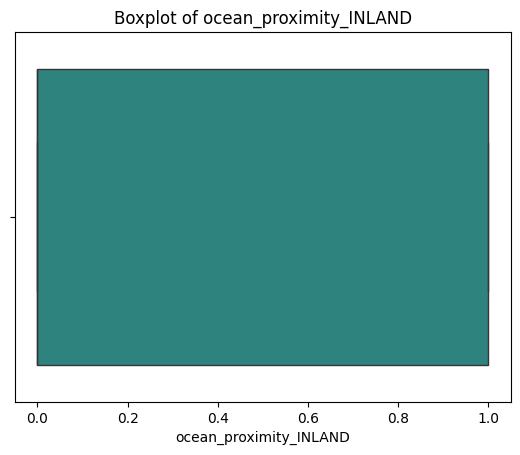

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


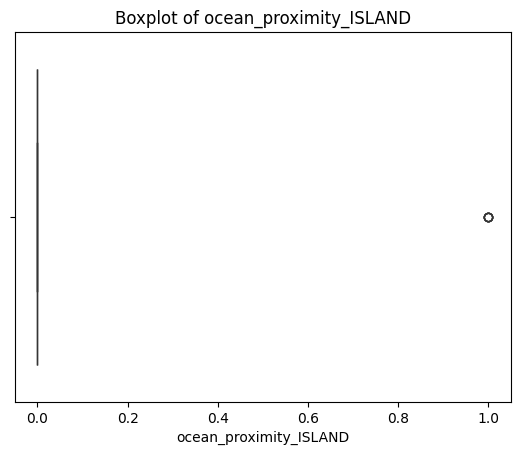

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


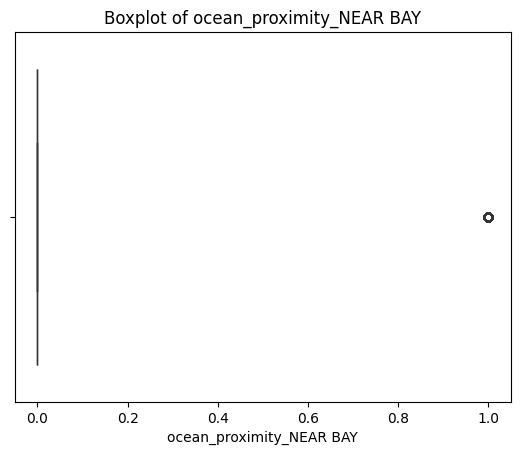

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\297637529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature,data=df_encoded,palette='viridis')


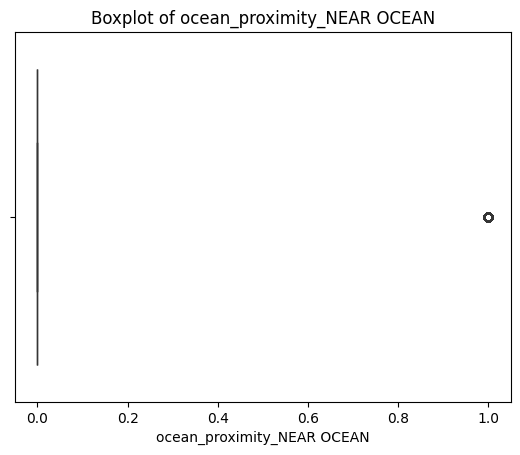

In [81]:
feature_name = df_encoded.columns

plt.figure(figsize=(10, 6))
for feature in feature_name:
    sns.boxplot(x=feature,data=df_encoded,palette='viridis')
    plt.title(f'Boxplot of {feature}')
    
    plt.show()


In [82]:
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.7 or correlation_matrix.iloc[i, j] < -0.7:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))

# Display the strong correlations
for col1, col2, value in strong_correlations:
    print(f"Strong correlation between {col1} and {col2}: {value:.2f}")

Strong correlation between latitude and longitude: -0.90
Strong correlation between total_bedrooms and total_rooms: 0.93
Strong correlation between population and total_rooms: 0.86
Strong correlation between population and total_bedrooms: 0.87
Strong correlation between households and total_rooms: 0.92
Strong correlation between households and total_bedrooms: 0.97
Strong correlation between households and population: 0.91


In [83]:
numerical_features = df_encoded.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

# Function to identify outliers using IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers


In [84]:
for feature in numerical_features:
    outliers = identify_outliers(df_encoded, feature)
    print(f"Outliers in {feature}:")
    print(outliers[feature])
    print("\n")

Outliers in longitude:
Series([], Name: longitude, dtype: int32)


Outliers in latitude:
Series([], Name: latitude, dtype: int32)


Outliers in housing_median_age:
Series([], Name: housing_median_age, dtype: int32)


Outliers in total_rooms:
1         7099
101       5806
104       5871
185       5963
283      12842
         ...  
20543     6861
20544     8800
20563    12139
20567     6809
20629    10035
Name: total_rooms, Length: 1287, dtype: int32


Outliers in total_bedrooms:
95       2477
96       1331
98       1270
100      1414
101      1603
         ... 
20539    1516
20543    1820
20544    1857
20563    2640
20629    1856
Name: total_bedrooms, Length: 1306, dtype: int32


Outliers in population:
95       3469
185      4367
283      4985
460      3337
485      3276
         ... 
20543    3717
20544    6330
20563    6837
20604    3265
20629    6912
Name: population, Length: 1196, dtype: int32


Outliers in households:
1        1138
95       2323
96       1180
98       1250
100    

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\3250607850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='median_house_value',x='ocean_proximity',data=df, palette='viridis')


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

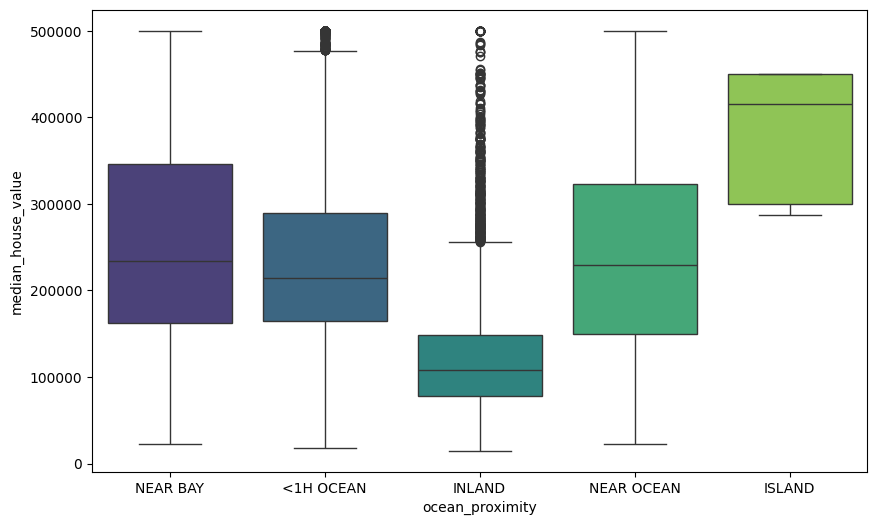

In [85]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='median_house_value',x='ocean_proximity',data=df, palette='viridis')

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\1579977741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_income',data=df,palette='viridis')


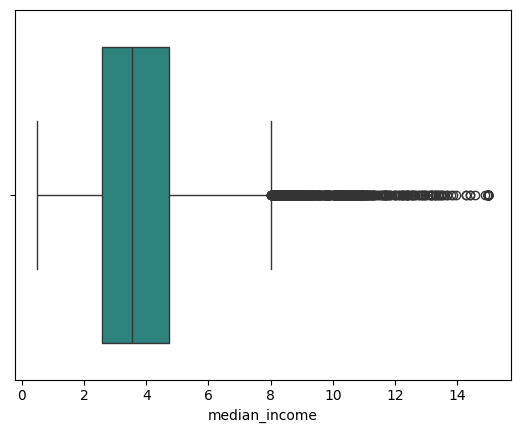

In [86]:
plt.plot(figsize=(10, 6))

sns.boxplot(x='median_income',data=df,palette='viridis')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\3881801765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cost_per_sqft', data=df, palette='viridis')


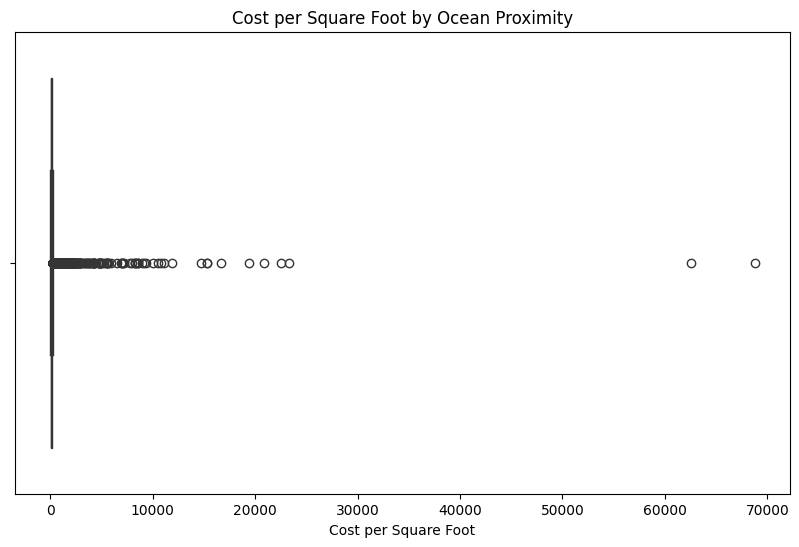

In [87]:
df['cost_per_sqft'] = df['median_house_value'] /df['total_rooms']

plt.figure(figsize=(10, 6))

sns.boxplot(x='cost_per_sqft', data=df, palette='viridis')
plt.title('Cost per Square Foot by Ocean Proximity')
plt.xlabel('Cost per Square Foot')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_26532\1723320026.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[0], shade=True)


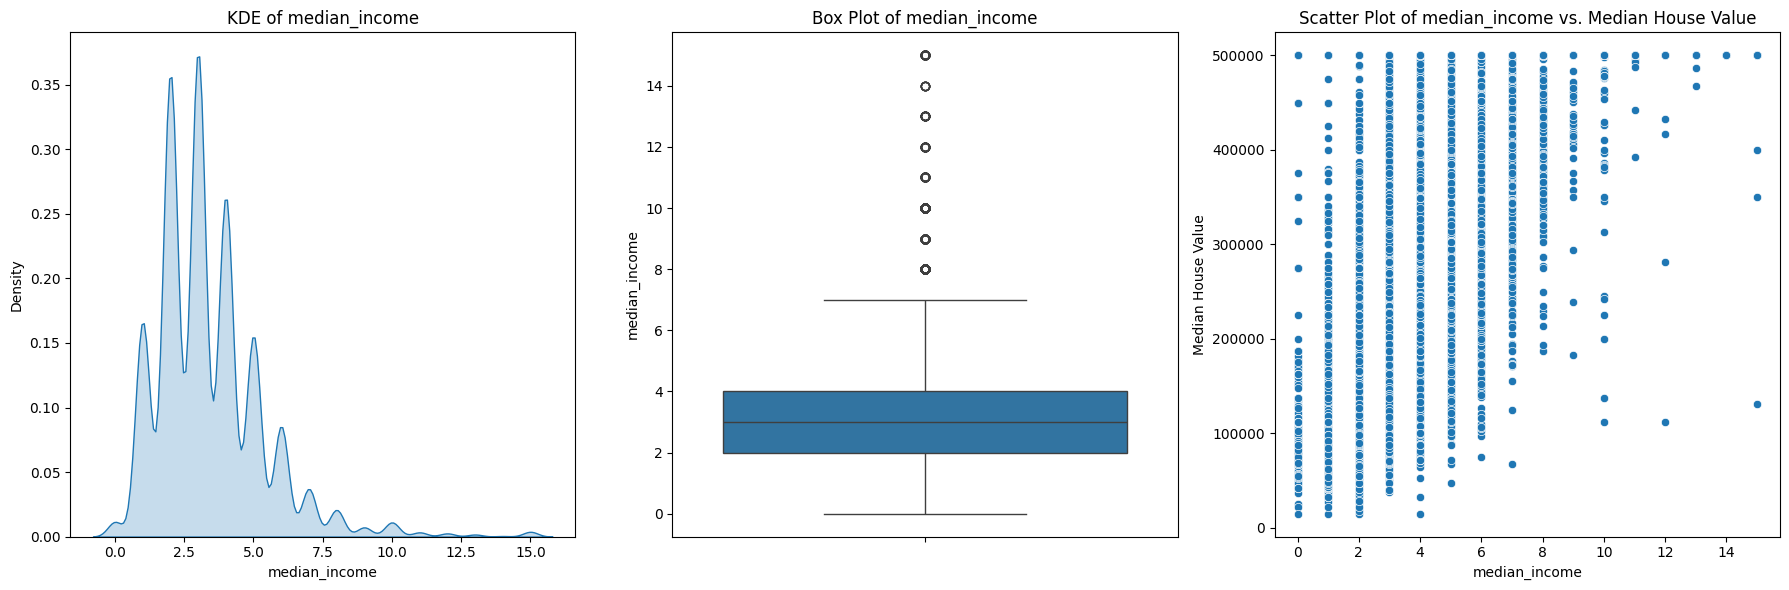

In [88]:


def visualize_column_distribution(df, column):
    """
    Visualize the distribution and relationship of a specified numerical column within a dataset.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the numerical column to visualize.
    """
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot KDE
    sns.kdeplot(df[column], ax=axes[0], shade=True)
    axes[0].set_title(f'KDE of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')
    
    # Plot Box Plot
    sns.boxplot(y=df[column], ax=axes[1])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel(column)
    
    # Plot Scatter Plot against 'median_house_value'
    sns.scatterplot(x=df[column], y=df['median_house_value'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. Median House Value')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Median House Value')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
# Assuming df_encoded is your DataFrame and you want to visualize the 'median_income' column
visualize_column_distribution(df_encoded, 'median_income')

Total number of outliers in median_house_value: 1383


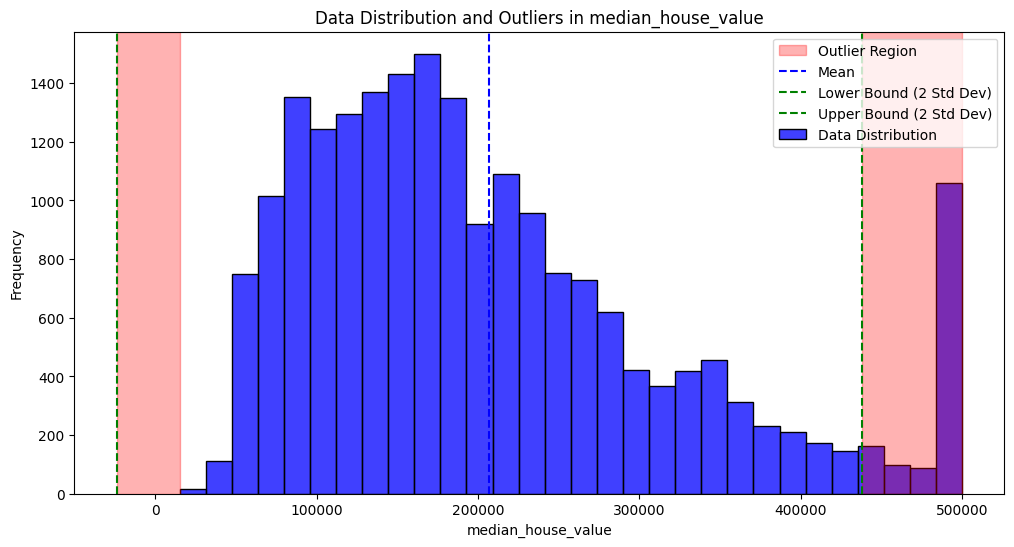

In [89]:


def identify_and_visualize_outliers(df, column):
    """
    Identify and visualize outliers in a numerical column of a dataset based on standard deviation.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the numerical column to analyze.
    """
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std_dev = df[column].std()
    
    # Calculate the lower and upper bounds
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Calculate the total number of outliers
    num_outliers = outliers.shape[0]
    
    # Print the total number of outliers
    print(f'Total number of outliers in {column}: {num_outliers}')
    
    # Visualize the data distribution
    plt.figure(figsize=(12, 6))
    
    # Plot the histogram
    sns.histplot(df[column], kde=False, bins=30, color='blue', label='Data Distribution')
    
    # Highlight the outlier regions
    plt.axvspan(df[column].min(), lower_bound, color='red', alpha=0.3, label='Outlier Region')
    plt.axvspan(upper_bound, df[column].max(), color='red', alpha=0.3)
    
    # Add lines for the mean and bounds
    plt.axvline(mean, color='blue', linestyle='--', label='Mean')
    plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (2 Std Dev)')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (2 Std Dev)')
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Data Distribution and Outliers in {column}')
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage
# Assuming df_encoded is your DataFrame and you want to analyze the 'median_income' column
identify_and_visualize_outliers(df_encoded, 'median_house_value')


   

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer


# Assuming df_encoded is your DataFrame with numerical features
numerical_features = df_encoded.select_dtypes(include=['float32', 'int32']).columns



# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Compare the resulting ranges
print("StandardScaler Ranges:")
print(df_standard_scaled.describe().loc[['min', 'max']])

print("\nMinMaxScaler Ranges:")
print(df_minmax_scaled.describe().loc[['min', 'max']])


robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
df_quantile_scaled = pd.DataFrame(quantile_transformer.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply PowerTransformer
power_transformer = PowerTransformer()
df_power_scaled = pd.DataFrame(power_transformer.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Compare the resulting ranges for additional scalers
print("\nRobustScaler Ranges:")
print(df_robust_scaled.describe().loc[['min', 'max']])

print("\nQuantileTransformer Ranges:")
print(df_quantile_scaled.describe().loc[['min', 'max']])

print("\nPowerTransformer Ranges:")
print(df_power_scaled.describe().loc[['min', 'max']])


StandardScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min  -2.421194 -1.451116           -2.196180    -1.207283       -1.277688   
max   2.563042  2.751490            1.856182    16.815580       14.087789   

     population  households  median_income  median_house_value  \
min   -1.256123   -1.303984      -1.756059           -1.662641   
max   30.250330   14.601520       6.007301            2.540411   

     ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
min                  -0.891156               -0.681889   
max                   1.122138                1.466514   

     ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
min               -0.015566                 -0.353264   
max               64.241731                  2.830742   

     ocean_proximity_NEAR OCEAN  
min                   -0.384466  
max                    2.601007  

MinMaxScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  

In [96]:
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,1665,374,845,330,1,78100,0,1,0,0,0
20636,-121,39,18,697,150,356,114,2,77100,0,1,0,0,0
20637,-121,39,17,2254,485,1007,433,1,92300,0,1,0,0,0
20638,-121,39,18,1860,409,741,349,1,84700,0,1,0,0,0


In [97]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,514.318182
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,50.500070
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,240.013633
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,267.896389
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,210.325753
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,46.906907
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,110.616930
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,40.949423
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,45.537634
